# Implementation

## Setting up Tensorflow
Restart runtime, set it to GPU and then run this chunk. The default is tf2.x which has slightly different functions. I prefer working with tf1.x

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## Loading Dataset
Loading the EEG dataset from physionet databases [1]. Physionet allows us to load dataset directly from cloud. 

In [3]:
# !wget -r -N -c -np https://physionet.org/files/chbmit/1.0.0/
!gsutil -m cp -r gs://chbmit-1.0.0.physionet.org DESTINATION

Copying gs://chbmit-1.0.0.physionet.org/ANNOTATORS...
Copying gs://chbmit-1.0.0.physionet.org/RECORDS...
Copying gs://chbmit-1.0.0.physionet.org/RECORDS-WITH-SEIZURES...
Copying gs://chbmit-1.0.0.physionet.org/SHA256SUMS.txt...
Copying gs://chbmit-1.0.0.physionet.org/SUBJECT-INFO...
Copying gs://chbmit-1.0.0.physionet.org/shoeb-icml-2010.pdf...
Copying gs://chbmit-1.0.0.physionet.org/chb-mit-scalp-eeg-database-1.0.0.zip...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01-summary.txt...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_01.edf...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_02.edf...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_03.edf...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_03.edf.seizures...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_04.edf...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_04.edf.seizures...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_05.edf...
Copying gs://chbmit-1.0.0.physionet.org/chb01/chb01_06

KeyboardInterrupt: ignored

Checking some files content.

In [3]:
file = '/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03-summary.txt'
f = open(file, 'r')
file_contents = f.read()ON
print(file_contents)

SyntaxError: ignored

In [4]:
!pip install pyedflib

     |████████████████████████████████| 1.2MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.19-cp36-cp36m-linux_x86_64.whl size=925700 sha256=b640fc806fc6775fe2d940fde3239db4f23d372136bbeba2fc5dd1a1912a07c7
  Stored in directory: /root/.cache/pip/wheels/1f/b7/24/a565e4f7471617165f1b040651b52d87ad1885aaf32e02d4f9
Successfully built pyedflib


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


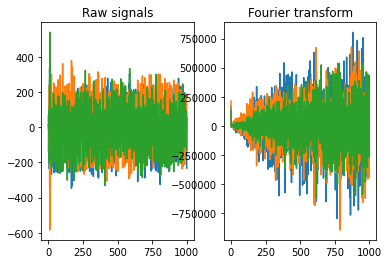

In [15]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# read an edf file
file2 = '/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_16+.edf'
signals, signal_headers, header = highlevel.read_edf(file2)

dft = np.fft.fft(signals, axis=1)

plt.subplot(1,2,1)
plt.plot(np.transpose(signals[0:3,:1000]))
plt.title('Raw signals')
plt.subplot(1,2,2)
plt.plot(np.transpose(dft[0:3,:1000]))
plt.title('Fourier transform')
plt.show()

## Preproccessing
Some basic data preprocessing includes obtaining signals in frequency domain usinf fft and shaping the data to arrange as labels and training+test data.

### First we will read all the ".edf" and ".txt" files in the directory and stack them.

In [1]:
import os

path = '/content/DESTINATION'

edfFiles = []
txtFiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if file[-4:] == '.edf':
            edfFiles.append(os.path.join(r, file))
        elif file[-4:] == '.txt':
            txtFiles.append(os.path.join(r, file))

edfFiles = sorted(edfFiles)
txtFiles = sorted(txtFiles)

for f in edfFiles:
    print(f)

for f in txtFiles:
    print(f)

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_01.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_02.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_03.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_04.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_05.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_06.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_07.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_08.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_09.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_10.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_11.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_12.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_13.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_14.edf
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_15

### Reading EDF & TXT files and stacking them in batches. 

In [2]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt

def generateLabels(edfFileName):
  sub = edfFileName[54:59]
  filePath = '/content/DESTINATION/chbmit-1.0.0.physionet.org/' + sub + '/' + sub + '-summary.txt'
  f = open(filePath, 'r')
  file_contents = f.read()

  file_list = file_contents.split('\n')
  sub = edfFileName[54:-4]
  sub = 'File Name: ' + sub + '.edf'
  ind = file_list.index(sub)

  seizures = list(map(int, re.findall(r'\d+', file_list[ind+3]) ))[0]
  start = []
  end   = []
  for i in range(seizures):
    start.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+4])))[0])
    end.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+5])))[0])
    # print(start, end)

  if seizures == 0:
    labels = np.zeros((3600))
  else:
    labels = np.ones((3600))
    labels[end[-1]:] *= 0
    for i in range(len(start)):
      labels[start[i]:end[i]] *= 2
  
  return labels


Shuffling and partitioning list.

In [3]:
import random

totalData       = len(edfFiles)
random.shuffle(edfFiles)
partition       = int(len(edfFiles) * 2/3)
edfFilesVal     = edfFiles[partition:]
edfFilesTrain   = edfFiles[:partition]
trainData       = len(edfFilesTrain)
valData         = len(edfFilesVal)

print(totalData, trainData, valData)

160 106 54


Frequency Domain

In [4]:
from keras.utils import to_categorical

def stackDFTTrain(nbatch = 2):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue
      
      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, np.fft.fft(signals, axis=1)), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
    
    

def stackDFTVal(nbatch = 1):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []
  
  while True:

    for f in edfFilesVal:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        # stackedDFT = np.reshape(stackedDFT, (1,)+stackedDFT.shape)
        # stackedDFT = np.reshape(stackedDFT, (1,23,256,3600
        # yield (np.reshape(stackedDFT[1:nbatch*3600//3 + 1,:,:,:], 
        #                   (1,)+stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape),
        #        to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue

      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue
      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, np.fft.fft(signals, axis=1)), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)


 

# for h in stackDFTVal():
#   print(len(h), h[0].shape, h[1].shape)
#   break

In [ ]:
for i in range(73):
  for h in stackDFTTrain():
    print(len(h), h[0].shape, h[1].shape)

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 18.66it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_10.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 18.83it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_31.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

(7201,)
2 (2400, 23, 256, 3) (2400, 3)
extra (1, 23, 256, 3) (1,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 18.49it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb08/chb08_10.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 18.60it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_15.edf (23, 921600)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 18.55it/s]

(7201,)
2 (2400, 23, 256, 3) (2400, 3)
extra (1, 23, 256, 3) (1,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 17.13it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_17.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.51it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_18.edf (23, 921600)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 19.13it/s]

(7201,)
2 (2400, 23, 256, 3) (2400, 3)
extra (1, 23, 256, 3) (1,)


Reading Channels:  43%|████▎     | 10/23 [00:00<00:00, 18.81it/s]

Time domain

In [5]:
from keras.utils import to_categorical

def stackTimeTrain(nbatch = 2):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue
      
      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, signals), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
    
    

def stackTimeVal(nbatch = 1):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue
      
      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, signals), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)

### Reading txt files and generating labels

In [ ]:
# import re
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# def generateLabels(edfFileName):
#   sub = edfFileName[54:-7]
#   filePath = '/content/DESTINATION/chbmit-1.0.0.physionet.org/' + sub + '-summary.txt'
#   f = open(file, 'r')
#   file_contents = f.read()

#   file_list = file_contents.split('\n')
#   sub = edfFileName[54:-4]
#   sub = 'File Name: ' + sub + '.edf'
#   ind = file_list.index(sub)

#   seizures = list(map(int, re.findall(r'\d+', file_list[ind+3]) ))[0]
#   start = []
#   end   = []
#   for i in range(seizures):
#     start.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+4])))[0])
#     end.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+5])))[0])
#     print(start, end)

#   if seizures == 0:
#     labels = np.zeros((23, 921600))
#   else:
#     labels = np.ones((23, 921600))
#     labels[:, end[-1]*256:] *= 0
#     for i in range(len(start)):
#       labels[:, start[i]*256:end[i]*256] *= 2
  
#   return labels



# def stackLabels(nbatch = 15, rejected = []):
#   count = 0

#   stackedLabels = np.zeros((23, 921600))

#   for f in edfFiles:
#     # print(f[54:-4])
#     count += 1
    
#     if f not in rejected:
#       stackedLabels = np.dstack((stackedLabels, generateLabels(f)))
    
#     if count % nbatch == 0:
#       yield stackedLabels
#       stackedLabels = np.zeros((23, 921600))



In [5]:
# rejected # Those samples which were of different size
i.

(23, 921600, 16)

In [15]:
print(len(stackedEEG))
# for eeg in stackedEEG:
#   print(eeg.shape)
i = 89
print(edfFiles[i])
signals, signal_headers, header = highlevel.read_edf(edfFiles[i])
print(signals.shape)

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

34
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_12.edf


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.94it/s]


(23, 921600)


In [18]:
921600/(1*60*60)

256.0

## Callback Class
In order to stop the training at a given threshold.

In [6]:
from keras.callbacks import Callback

# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.95

class myCallback(Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('acc') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

## Building a CNN for Frequency domain


Here we just import some libraries and use them to buid an architecture. 

In [12]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from keras.utils import to_categorical

nBatch = 2

in1 = Input(shape=(23, 256, 3))
c1 = Conv2D(16, (5,5), activation='relu')(in1)
# m1 = MaxPooling2D()(c1)
m1 = AveragePooling2D()(c1)
# c2 = Conv2D(128, (5,5), activation='relu')(m1)
# # m2 = MaxPooling2D()(c2)
# d1 = Dropout(0.7)(c2)
# c3 = Conv2D(256, (5,5), activation='relu')(d1)
# # m3 = MaxPooling2D()(c3)
# d2 = Dropout(0.8)(c3)
# # c4 = Conv2D(64, (3,3), activation='relu')(d2)
# # m4 = MaxPooling2D()(c4)
# fl = Flatten()(d2)
# d1 = Dense(64, activation='relu')(fl)
# d2 = Dense(16, activation='relu')(d1)
# o = Dense(921600*nBatch, activation='softmax')(m1)
fl = Flatten()(m1)
# d1 = Dense(4, activation='relu')(fl)
o = Dense(3, activation='sigmoid')(fl)

model = Model(inputs=in1, outputs=o)
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 23, 256, 3)]      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 252, 16)       1216      
_________________________________________________________________
average_pooling2d (AveragePo (None, 9, 126, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18144)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 54435     
Total params: 55,651
Trainable params: 55,651
Non-trainable params: 0
_________________________________________________________________
None


Now after we have constructed our model let's train it. 

In [13]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['acc'])
# stepsTrain = int(len(edfFiles)/nBatch * 11/15)
# stepsVal = int(len(edfFiles)/nBatch * 4/15)
testSteps = int(trainData/16)
valSteps = int(valData/4)
history_cnn = model.fit_generator(generator = stackDFTTrain(), 
                                  steps_per_epoch = testSteps, 
                                  epochs = 4, 
                                  validation_data = stackDFTVal(), 
                                  validation_steps = valSteps)
                                  # callbacks=[callbacks])

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.80it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_03.edf (23, 3686400)
(3601,)
Epoch 1/4


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.45it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.14it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_30.edf (23, 921600)
(3600,)
1/6 [====>.........................] - ETA: 0s - loss: 15.9424 - acc: 0.0000e+00

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  7.92it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_03.edf (23, 921600)
(3600,)
2/6 [=========>....................] - ETA: 16s - loss: 8.5172 - acc: 0.5000    

Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   9%|▊         | 2/23 [00:01<00:18,  1.16it/s]



Reading Channels:  13%|█▎        | 3/23 [00:01<00:13,  1.48it/s]

3/6 [==============>...............] - ETA: 19s - loss: 5.9231 - acc: 0.6667

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.22it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_15.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.27it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_32.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_26.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

4/6 [===================>..........] - ETA: 19s - loss: 4.4423 - acc: 0.7500

Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_04.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_07.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.13s/it]

5/6 [========================>.....] - ETA: 10s - loss: 3.5539 - acc: 0.8000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_41.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_10.edf (23, 921600)


Reading Channels:   9%|▊         | 2/23 [00:01<00:17,  1.17it/s]

6/6 [==============================] - ETA: 0s - loss: 2.9616 - acc: 0.8333 

Reading Channels: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_15.edf (23, 921600)
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_03.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)


Reading Channels: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_04.edf (23, 3686400)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.23it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_28.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_16+.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_36.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.02it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_08.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.03it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_37.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.93it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_21.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.19it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_31.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.05it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_11.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.00it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_21.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_06.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_07.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_24.edf (23, 921600)
6/6 [==============================] - 303s 51s/step - loss: 2.9616 - acc: 0.8333 - val_loss: 3.0283 - val_acc: 0.8121


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2/4
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_27.edf (23, 921600)


Reading Channels:   4%|▍         | 1/24 [00:04<01:45,  4.61s/it]

1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:03<00:00,  5.90it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_06.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_02.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:25,  1.14s/it]

2/6 [=========>....................] - ETA: 51s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_01.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_22.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.12s/it]



Reading Channels:   9%|▊         | 2/23 [00:01<00:18,  1.16it/s]

3/6 [==============>...............] - ETA: 40s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.12it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_42.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_10.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

4/6 [===================>..........] - ETA: 26s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.22it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_04.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels:  12%|█▎        | 3/24 [00:05<00:49,  2.35s/it]

5/6 [========================>.....] - ETA: 13s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_05.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.33it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_27.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_19.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

6/6 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000 

Reading Channels: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_29.edf (23, 921600)
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_33.edf (23, 921600)
(7200,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_24.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_05.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_30.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.89it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_02.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.68it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_15.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_05.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.95it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_18.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_09.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_24.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.94it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_01.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.10it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_11.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_31.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_34.edf (23, 921600)
6/6 [==============================] - 231s 38s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3/4
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.44it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_08.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:00<00:16,  1.34it/s]

1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_31.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.19it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_08.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:25,  1.14s/it]

2/6 [=========>....................] - ETA: 38s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_21.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_35.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.13s/it]

3/6 [==============>...............] - ETA: 33s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_13.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_25.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

4/6 [===================>..........] - ETA: 28s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_06.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.43it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_32.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.11s/it]

5/6 [========================>.....] - ETA: 16s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_02.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels:  12%|█▎        | 3/24 [00:05<00:50,  2.42s/it]

6/6 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000 

Reading Channels: 100%|██████████| 23/23 [00:10<00:00,  2.17it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_29.edf (23, 921600)


Reading Channels:  87%|████████▋ | 20/23 [00:04<00:00,  8.03it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_22.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.46it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_19.edf (23, 921600)


Reading Channels:  78%|███████▊  | 18/23 [00:05<00:00,  6.06it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_14.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:06<00:00,  3.78it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_35.edf (23, 921600)
(7200,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.23it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_18.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.14it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_04.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_16.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.24it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_39.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.19it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_22.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_19.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_10.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.04it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_02.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  3.98it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_03.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:23<00:00,  1.03s/it]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_04.edf (23, 3686400)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.61it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_28.edf (23, 921600)
6/6 [==============================] - 331s 55s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.6413 - val_acc: 0.6500


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4/4
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.11it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_38.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:24<00:00,  1.05s/it]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_02.edf (23, 3686400)
(7200,)
extra (3601, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(0,)
extra (1201, 23, 256, 3) (0,)


Reading Channels:  17%|█▋        | 4/23 [00:02<00:12,  1.53it/s]

2/6 [=========>....................] - ETA: 1:17 - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  3.99it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_12.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(3600,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  3.98it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_43.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

3/6 [==============>...............] - ETA: 59s - loss: 1.1921e-07 - acc: 1.0000 

Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.11it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_14.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.35it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_03.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:26,  1.22s/it]

4/6 [===================>..........] - ETA: 44s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.70it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_36.edf (23, 921600)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.35it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_13.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.12s/it]

5/6 [========================>.....] - ETA: 20s - loss: 0.6716 - acc: 0.9583    

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.00it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_23.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

(7200,)
extra (1, 23, 256, 3) (0,)


Reading Channels:  17%|█▋        | 4/24 [00:09<00:59,  2.99s/it]

6/6 [==============================] - ETA: 0s - loss: 0.5597 - acc: 0.9653 

Reading Channels: 100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_16+.edf (23, 921600)


Reading Channels:  42%|████▏     | 10/24 [00:11<00:08,  1.73it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_12.edf (23, 921600)


Reading Channels:  13%|█▎        | 3/23 [00:01<00:13,  1.45it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_08.edf

Reading Channels:  17%|█▋        | 4/23 [00:01<00:10,  1.80it/s]

 (23, 921600)


Reading Channels:  78%|███████▊  | 18/23 [00:04<00:00,  6.75it/s]

(7200,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.85it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_36.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.13it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_08.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.22it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_37.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.96it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_21.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.18it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_31.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_11.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_21.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.64it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_06.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.09it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_07.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_24.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.11it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_33.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.93it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_24.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_05.edf (23, 921600)
6/6 [==============================] - 325s 54s/step - loss: 0.5597 - acc: 0.9653 - val_loss: 3.0283 - val_acc: 0.8121


### Results

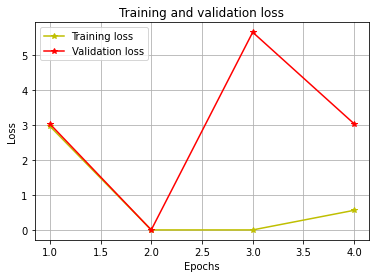

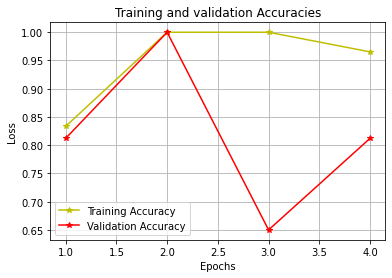

In [15]:
import matplotlib.pyplot as pyplot

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
pyplot.grid()
pyplot.plot(epochs, loss, '*y-', label='Training loss')
pyplot.plot(epochs, val_loss, '*r-', label='Validation loss')
pyplot.title('Training and validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

pyplot.grid()
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
epochs = range(1, len(loss) + 1)
pyplot.plot(epochs, acc, '*y-', label='Training Accuracy')
pyplot.plot(epochs, val_acc, '*r-', label='Validation Accuracy')
pyplot.title('Training and validation Accuracies')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [12]:
history_cnn.history

{'acc': [0.9859672784805298],
 'loss': [0.15957626700401306],
 'val_acc': [0.9030434489250183],
 'val_loss': [1.5627541542053223]}

## CNN for Time domain

Repeating the process for Time domain, with the same parameters and architecture.

In [7]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from keras.utils import to_categorical

nBatch = 2

in1 = Input(shape=(23, 256, 3))
c1 = Conv2D(16, (5,5), activation='relu')(in1)
m1 = MaxPooling2D()(c1)
# m1 = AveragePooling2D()(c1)
# c2 = Conv2D(128, (5,5), activation='relu')(m1)
# # m2 = MaxPooling2D()(c2)
# d1 = Dropout(0.7)(c2)
# c3 = Conv2D(256, (5,5), activation='relu')(d1)
# # m3 = MaxPooling2D()(c3)
# d2 = Dropout(0.8)(c3)
# # c4 = Conv2D(64, (3,3), activation='relu')(d2)
# # m4 = MaxPooling2D()(c4)
# fl = Flatten()(d2)
# d1 = Dense(64, activation='relu')(fl)
# d2 = Dense(16, activation='relu')(d1)
# o = Dense(921600*nBatch, activation='softmax')(m1)
fl = Flatten()(m1)
# d1 = Dense(4, activation='relu')(fl)
o = Dense(3, activation='sigmoid')(fl)

model2 = Model(inputs=in1, outputs=o)
print(model2.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 23, 256, 3)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 252, 16)       1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 126, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18144)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 54435     
Total params: 55,651
Trainable params: 55,651
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['acc'])
# stepsTrain = int(len(edfFiles)/nBatch * 11/15)
# stepsVal = int(len(edfFiles)/nBatch * 4/15)
testSteps = int(trainData/16)
valSteps = int(valData/4)
history_cnn2 = model2.fit_generator(generator = stackTimeTrain(),
                                    steps_per_epoch = testSteps, 
                                    epochs = 4, 
                                    validation_data = stackTimeVal(), 
                                    validation_steps = valSteps)
                                    # callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.


Reading Channels: 100%|██████████| 23/23 [00:38<00:00,  1.67s/it]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_03.edf (23, 3686400)
(3601,)
Epoch 1/4


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels:  43%|████▎     | 10/23 [00:10<00:12,  1.05it/s]

1/6 [====>.........................] - ETA: 0s - loss: 1.6584 - acc: 0.7200

Reading Channels: 100%|██████████| 23/23 [00:12<00:00,  1.89it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_30.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_03.edf (23, 921600)
2/6 [=========>....................] - ETA: 22s - loss: 0.8292 - acc: 0.8600


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:  33%|███▎      | 8/24 [00:08<00:13,  1.23it/s]

3/6 [==============>...............] - ETA: 21s - loss: 0.5528 - acc: 0.9067

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_15.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_32.edf (23, 921600)
(7200,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_26.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:40,  1.84s/it]

4/6 [===================>..........] - ETA: 24s - loss: 0.4146 - acc: 0.9300

Reading Channels: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_04.edf (23, 921600)
(7200,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  9.59it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_07.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_41.edf (23, 921600)
(7200,)
5/6 [========================>.....] - ETA: 13s - loss: 0.3317 - acc: 0.9440

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_10.edf (23, 921600)


Reading Channels:  26%|██▌       | 6/23 [00:02<00:07,  2.26it/s]

Reading Channels:  30%|███       | 7/23 [00:02<00:06,  2.56it/s]

6/6 [==============================] - ETA: 0s - loss: 0.2764 - acc: 0.9533 


Reading Channels:  78%|███████▊  | 18/23 [00:05<00:01,  4.52it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_15.edf (23, 921600)


Reading Channels:  87%|████████▋ | 20/23 [00:05<00:00,  4.43it/s]

(7200,)


Reading Channels: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_03.edf (23, 3686400)
(3601,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (3601, 23, 256, 3) (1,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.23it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_30.edf (23, 921600)
(3601,)
extra (3601, 23, 256, 3) (1,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.31it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_03.edf (23, 921600)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

(3601,)
extra (3601, 23, 256, 3) (1,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 19.22it/s]

(1,)
extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.35it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_15.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.91it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.04it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_32.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.84it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.08it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_26.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.34it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_04.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.89it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.29it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_07.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.05it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_41.edf (23, 921600)
(3600,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 13.95it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 11.50it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_10.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.10it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.42it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_15.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_27.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(0,)
extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:03<00:00,  5.77it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_06.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.13it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_02.edf (23, 921600)
(3600,)
6/6 [==============================] - 145s 24s/step - loss: 0.2764 - acc: 0.9533 - val_loss: 2.4797 - val_acc: 0.8462


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.93it/s]

Epoch 2/4
extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_27.edf (23, 921600)


Reading Channels:  92%|█████████▏| 22/24 [00:07<00:00,  3.10it/s]

1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.19it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_06.edf (23, 921600)
(7200,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:03,  6.97it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_02.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_01.edf (23, 921600)
(7200,)
2/6 [=========>....................] - ETA: 23s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_22.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.47it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_42.edf (23, 921600)
(7200,)
3/6 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_10.edf (23, 921600)


Reading Channels:  39%|███▉      | 9/23 [00:03<00:04,  3.10it/s]

4/6 [===================>..........] - ETA: 14s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.66it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_04.edf (23, 921600)
(7200,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:  12%|█▎        | 3/24 [00:05<00:49,  2.36s/it]

5/6 [========================>.....] - ETA: 8s - loss: 1.1921e-07 - acc: 1.0000 

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_05.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_27.edf (23, 921600)
(7200,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_19.edf (23, 921600)


Reading Channels:  35%|███▍      | 8/23 [00:03<00:05,  2.96it/s]

6/6 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:  61%|██████    | 14/23 [00:04<00:02,  4.45it/s]

extra (1201, 23, 256, 3) (0,)



Reading Channels:  65%|██████▌   | 15/23 [00:01<00:00, 12.27it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_29.edf (23, 921600)
(7200,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.55it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_01.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.57it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.94it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_22.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.90it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_42.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.08it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_10.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.41it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.12it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_04.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 19.49it/s]

(0,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.14it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_05.edf (23, 921600)
(3600,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 11.25it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.07it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_27.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:03,  7.17it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.44it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_19.edf (23, 921600)
(3600,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 14.08it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.97it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_29.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_08.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_31.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.95it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_08.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_21.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.15it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_35.edf (23, 921600)
(3600,)
6/6 [==============================] - 124s 21s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.4329 - val_acc: 0.9731


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.67it/s]

Epoch 3/4
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  8.57it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_08.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 11.72it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_31.edf (23, 921600)
(7200,)
1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.54it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_08.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.95it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_21.edf (23, 921600)
(7200,)
2/6 [=========>....................] - ETA: 17s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.57it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_35.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_13.edf (23, 921600)
(7200,)
3/6 [==============>...............] - ETA: 18s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_25.edf (23, 921600)


Reading Channels:  46%|████▌     | 11/24 [00:03<00:04,  2.93it/s]

4/6 [===================>..........] - ETA: 14s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.18it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_06.edf (23, 921600)
(7200,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_32.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 12.40it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_02.edf (23, 921600)
(7200,)
5/6 [========================>.....] - ETA: 8s - loss: 1.1921e-07 - acc: 1.0000 

Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:  17%|█▋        | 4/24 [00:09<00:59,  2.98s/it]

6/6 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 24/24 [00:17<00:00,  1.41it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_13.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  9.50it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_22.edf (23, 921600)
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_25.edf (23, 921600)


Reading Channels:   4%|▍         | 1/24 [00:04<01:47,  4.67s/it]

(3600,)


Reading Channels:  33%|███▎      | 8/24 [00:11<00:16,  1.03s/it]


extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 11.83it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_14.edf (23, 921600)
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_06.edf (23, 921600)
(7200,)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.95it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.06it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_32.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.25it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb05/chb05_02.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.31it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_22.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.41it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_14.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.27it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_38.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_02.edf (23, 3686400)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (3601, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

(0,)
extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.36it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_12.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.35it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_43.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (2401, 23, 256, 3) (0,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 19.49it/s]

(0,)
extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.23it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_14.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.17it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_03.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.11it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_36.edf (23, 921600)
(3600,)
6/6 [==============================] - 168s 28s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.5166 - val_acc: 0.9679
Epoch 4/4


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.29it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.69it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_38.edf (23, 921600)


Reading Channels:  78%|███████▊  | 18/23 [00:05<00:01,  3.29it/s]

1/6 [====>.........................] - ETA: 0s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb04/chb04_02.edf (23, 3686400)
(7200,)


Reading Channels:   4%|▍         | 1/24 [00:00<00:04,  5.29it/s]

extra (3601, 23, 256, 3) (0,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:03,  6.85it/s]

(0,)
extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 10.27it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_12.edf (23, 921600)
(3600,)
2/6 [=========>....................] - ETA: 23s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  8.30it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_43.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.80it/s]


3/6 [==============>...............] - ETA: 23s - loss: 1.1921e-07 - acc: 1.0000/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_14.edf (23, 921600)
(7200,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:03,  6.09it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_03.edf (23, 921600)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00,  9.52it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_36.edf (23, 921600)
(7200,)
4/6 [===================>..........] - ETA: 18s - loss: 1.1921e-07 - acc: 1.0000

Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_13.edf (23, 921600)


Reading Channels:  43%|████▎     | 10/23 [00:03<00:03,  3.33it/s]

5/6 [========================>.....] - ETA: 9s - loss: 0.6716 - acc: 0.9583     

Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_23.edf (23, 921600)
(7200,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels:  12%|█▎        | 3/24 [00:05<00:49,  2.36s/it]

6/6 [==============================] - ETA: 0s - loss: 0.5597 - acc: 0.9653

Reading Channels:  21%|██        | 5/24 [00:09<00:40,  2.15s/it]


extra (1201, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_13.edf (23, 921600)


Reading Channels:   4%|▍         | 1/23 [00:01<00:24,  1.11s/it]

(3600,)


Reading Channels:  17%|█▋        | 4/23 [00:01<00:10,  1.77it/s]


extra (1201, 23, 256, 3) (0,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_12.edf (23, 921600)
/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_23.edf (23, 921600)


Reading Channels:  13%|█▎        | 3/23 [00:01<00:13,  1.48it/s]

(3600,)


Reading Channels:  61%|██████    | 14/23 [00:04<00:02,  4.35it/s]

extra (1201, 23, 256, 3) (0,)



Reading Channels:  46%|████▌     | 11/24 [00:02<00:03,  4.30it/s]

/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_08.edf (23, 921600)


Reading Channels:  54%|█████▍    | 13/24 [00:03<00:02,  4.28it/s]

(7200,)


Reading Channels:   9%|▊         | 2/23 [00:00<00:01, 19.63it/s]

(0,)
extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:01<00:00, 19.03it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_12.edf (23, 921600)
(3600,)


Reading Channels:   4%|▍         | 1/23 [00:00<00:02,  7.52it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:02<00:00, 11.12it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_08.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/24 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_14.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.89it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_09.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.96it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_05.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.96it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_40.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.03it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb03/chb03_09.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.00it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_37.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  5.07it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_13.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_34.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb02/chb02_07.edf (23, 921600)
(3600,)


Reading Channels:   0%|          | 0/23 [00:00<?, ?it/s]

extra (1, 23, 256, 3) (0,)


Reading Channels: 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]


/content/DESTINATION/chbmit-1.0.0.physionet.org/chb01/chb01_33.edf (23, 921600)
(3600,)
6/6 [==============================] - 149s 25s/step - loss: 0.5597 - acc: 0.9653 - val_loss: 1.1921e-07 - val_acc: 1.0000


### Results

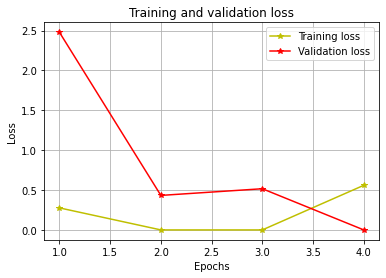

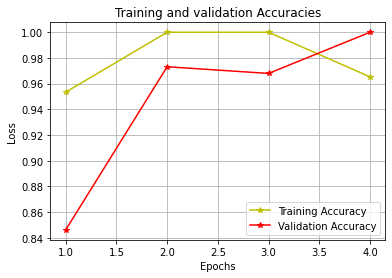

In [11]:
import matplotlib.pyplot as pyplot

loss2 = history_cnn2.history['loss']
val_loss2 = history_cnn2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
pyplot.grid()
pyplot.plot(epochs2, loss2, '*y-', label='Training loss')
pyplot.plot(epochs2, val_loss2, '*r-', label='Validation loss')
pyplot.title('Training and validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

pyplot.grid()
acc2 = history_cnn2.history['acc']
val_acc2 = history_cnn2.history['val_acc']
epochs2 = range(1, len(loss2) + 1)
pyplot.plot(epochs2, acc2, '*y-', label='Training Accuracy')
pyplot.plot(epochs2, val_acc2, '*r-', label='Validation Accuracy')
pyplot.title('Training and validation Accuracies')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

## Discussion and Conclusion

Yay our implementation is successful...

# Bibliography
[1] CHB-MIT Scalp EEG Database, Retrieved from: https://physionet.org/content/chbmit/1.0.0/
